<h1>Breast Cancer Classification</h1><br>

##### Goal is to determine whether a tumor is benign or melignant, meaning it is a Binary Classification problem.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading & DataFrame Creation

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
cancer_dataset.keys()
df = pd.DataFrame(cancer_dataset['data'], columns=cancer_dataset.feature_names)
df['target'] = cancer_dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Data Report

In [3]:
# ProfileReport(data) -> if we wanted detail 
print(cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Feature DataFrame

In [4]:
df_feat = pd.DataFrame(cancer_dataset['data'],columns=cancer_dataset['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Target DataFrame

In [5]:
df_target = pd.DataFrame(cancer_dataset['target'],columns=['Cancer'])
print(df_target)
df_target=np.ravel(df_target)  # reshaped into n samples

     Cancer
0         0
1         0
2         0
3         0
4         0
..      ...
564       0
565       0
566       0
567       0
568       1

[569 rows x 1 columns]


### Null Value Check

In [6]:
df_feat.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

#### Incase target DF wasnt N sample I would use label encoder to convert 

## Splitting Data -> Test Train Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=101)

In [9]:
accuracy_only = {}

# Application of ML models & accuracy

## 1. Logistics Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as ms

In [11]:
# Define model and its parameters
log_reg = LogisticRegression()

In [12]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [13]:
# predicting test data
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [14]:
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(log_reg.score(X_test, y_test)*100))
accuracy_only['Logistic Regression'] = log_reg.score(X_test,y_test)*100

Accuracy of logistic regression classifier on test set: 92.40%


In [15]:
# Confusion Matrix
ms.confusion_matrix(y_test,y_pred)

array([[ 57,   9],
       [  4, 101]])

In [16]:
print(ms.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90        66
           1       0.92      0.96      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



## 2. Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [18]:
DT = DecisionTreeClassifier()

In [19]:
DT = DT.fit(X_train,y_train)

In [20]:
y_pred = DT.predict(X_test)

In [21]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}%'.format(DT.score(X_test, y_test)*100))
accuracy_only['Decision Tree'] = DT.score(X_test,y_test)*100

Accuracy of Decision Tree classifier on test set: 91.23%


In [22]:
# Confusion Matrix
ms.confusion_matrix(y_test,y_pred)

array([[58,  8],
       [ 7, 98]])

In [23]:
print(ms.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        66
           1       0.92      0.93      0.93       105

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



## 3. Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred = rf.predict(X_test)


In [28]:
# Confusion Matrix
ms.confusion_matrix(y_test,y_pred)

array([[ 61,   5],
       [  3, 102]])

In [29]:
print('Accuracy of Random Forest classifier on test set: {:.2f}%'.format(rf.score(X_test, y_test)*100))
accuracy_only['Random Forest'] = rf.score(X_test,y_test)*100

Accuracy of Random Forest classifier on test set: 95.32%


In [30]:
print(ms.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        66
           1       0.95      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## 4.Stochastic Gradient Descent

In [31]:
from sklearn.linear_model import SGDClassifier

In [32]:
sgd = SGDClassifier()

In [33]:
sgd.fit(X_train,y_train)

SGDClassifier()

In [34]:
y_pred = sgd.predict(X_test)

In [35]:
# Confusion Matrix
ms.confusion_matrix(y_test,y_pred)

array([[61,  5],
       [33, 72]])

In [36]:
print('Accuracy of Stochastic Gradient Descent classifier on test set: {:.2f}%'.format(sgd.score(X_test, y_test)*100))
accuracy_only['Stochastic Gradient Descent'] = sgd.score(X_test,y_test)*100

Accuracy of Stochastic Gradient Descent classifier on test set: 77.78%


In [37]:
print(ms.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        66
           1       0.94      0.69      0.79       105

    accuracy                           0.78       171
   macro avg       0.79      0.80      0.78       171
weighted avg       0.82      0.78      0.78       171



## 5. Support Vector Machines(SVM)

In [38]:
from sklearn import svm

In [39]:
svm_model = svm.SVC()

In [40]:
svm_model.fit(X_train,y_train)

SVC()

In [41]:
y_pred_svm = svm_model.predict(X_test)

In [42]:
# Confusion Matrix
ms.confusion_matrix(y_test,y_pred)

array([[61,  5],
       [33, 72]])

In [43]:
print('Accuracy of SVM classifier on test set: {:.2f}%'.format(svm_model.score(X_test, y_test)*100))
accuracy_only['SVM'] = svm_model.score(X_test,y_test)*100

Accuracy of SVM classifier on test set: 92.40%


In [44]:
print(ms.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        66
           1       0.94      0.69      0.79       105

    accuracy                           0.78       171
   macro avg       0.79      0.80      0.78       171
weighted avg       0.82      0.78      0.78       171



### Accuracy of all models

In [45]:
accuracy_df = pd.DataFrame(accuracy_only.items())

In [46]:
accuracy_df.rename(columns={0:'Algorithm',1:'Accuracy(%)'},inplace=True)

In [47]:
accuracy_df

,Algorithm,Accuracy(%)
0,Logistic Regression,92.397661
1,Decision Tree,91.228070
2,Random Forest,95.321637
3,Stochastic Gradient Descent,77.777778
4,SVM,92.397661


# Observations After applying GridSearchCV 

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
model_params ={
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'max_iter':[500,1000],
#             'C':[1,5,10],
            'penalty':['l1','l2']
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy', 'log_loss'],
            'splitter': ['best','random'],
            'ccp_alpha':[0.01,0.001,0.0001,0.00455],
            'random_state':[0,1,42,10]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100,1000],
            'criterion':['gini', 'entropy', 'log_loss'],
            'random_state':[0,1,3,42,10],
            'ccp_alpha':[0.01,0.001,0.0001,0.025],
        }
    },
    'SGD':{
        'model':SGDClassifier(),
        'params':{
            'loss':['hinge','log_loss','modified_huber'],
            'penalty':['l1', 'l2', 'elasticnet'],
            'alpha':[0.01,0.001,0.0001],
            'random_state':[0,1,3,42,10]
        }
    },
    'SVM':{
        'model':svm.SVC(),
        'params':{
            'kernel':['rbf','sigmoid'],
            'gamma':['scale', 'auto'],
            'random_state':[0,1,3,42,10]
        }
    }
}

In [50]:
accuracy_score_model = []
for model_name, mp in model_params.items():
    model = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    model.fit(X_test,y_test)
    
    accuracy_score_model.append({
        'model': model_name,
        'best_accuracy': model.best_score_*100,
        'best parameters':model.best_params_
    })

In [51]:
pd.set_option('max_colwidth', -1)

In [52]:
grid_accuracy = pd.DataFrame(accuracy_score_model)
grid_accuracy

,model,best_accuracy,best parameters
0,logistic_regression,91.831933,"{'max_iter': 500, 'penalty': 'l2'}"
1,decision_tree,93.546218,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'random_state': 10, 'splitter': 'random'}"
2,random_forest,94.756303,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'n_estimators': 10, 'random_state': 3}"
3,SGD,92.420168,"{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet', 'random_state': 3}"
4,SVM,88.336134,"{'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}"


### Feature selection (30->5)

In [53]:
from sklearn.feature_selection import RFE

In [54]:
def rfe_selector(X, y,clf, num_feats):

    rfe_lr = RFE(estimator=clf,  n_features_to_select = num_feats, step=1,verbose=5)
    
    rfe_lr = rfe_lr.fit(X,y)
    
    rfe_support = rfe_lr.get_support()
    rfe_feature = X.iloc[:,rfe_support].columns.tolist()
    
    return rfe_feature

In [55]:
models = {'Logistic Regression':LogisticRegression(),'Decision Tree':DecisionTreeClassifier(),
         'Random Forest':RandomForestClassifier(), 'SGDS':SGDClassifier(),'SVM':svm.SVC(kernel='linear')}

In [56]:
best_features = {}
for model_name, model in models.items():
    best_params = rfe_selector(df_feat,df_target,model,5)
    best_features[model_name] = best_params

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 featur

In [57]:
best_features

{'Logistic Regression': ['mean concavity',
  'radius error',
  'worst compactness',
  'worst concavity',
  'worst concave points'],
 'Decision Tree': ['worst radius',
  'worst texture',
  'worst area',
  'worst smoothness',
  'worst concave points'],
 'Random Forest': ['mean concave points',
  'worst radius',
  'worst perimeter',
  'worst area',
  'worst concave points'],
 'SGDS': ['mean perimeter',
  'mean area',
  'area error',
  'worst perimeter',
  'worst area'],
 'SVM': ['worst smoothness',
  'worst compactness',
  'worst concavity',
  'worst concave points',
  'worst symmetry']}

In [58]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(), SGDClassifier(),svm.SVC(kernel='linear')]

In [59]:
accuracy_feature_selection = {}

#### Accuracy scores after Feature Selection

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
for key,value,model in zip(best_features.keys(),best_features.values(),models):
    X_train,X_test, y_train,y_test = train_test_split(df_feat,df_target,random_state=0,stratify=df_target,test_size=0.25)
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_feature_selection[key] = round(accuracy_score(y_test,y_pred)*100,4) 
#     print(accuracy_score(y_test,y_pred))

In [62]:
feature_selection = pd.DataFrame(accuracy_feature_selection.items(),
             columns=['Algorithms','Accuracy'])
feature_selection

,Algorithms,Accuracy
0,Logistic Regression,93.0070
1,Decision Tree,91.6084
2,Random Forest,95.1049
3,SGDS,76.2238
4,SVM,94.4056


In [63]:
final_compare = pd.DataFrame()
final_compare['Algorithms'] = accuracy_df.Algorithm.to_list()
final_compare['Simple Accuracy'] = accuracy_df['Accuracy(%)']
final_compare['After GridSearchCV'] = grid_accuracy.best_accuracy
final_compare['After Feature Selection'] = feature_selection.Accuracy
final_compare

,Algorithms,Simple Accuracy,After GridSearchCV,After Feature Selection
0,Logistic Regression,92.397661,91.831933,93.0070
1,Decision Tree,91.228070,93.546218,91.6084
2,Random Forest,95.321637,94.756303,95.1049
3,Stochastic Gradient Descent,77.777778,92.420168,76.2238
4,SVM,92.397661,88.336134,94.4056


### Additional Model: K-Means Clustering

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('target',axis=1)) 
print(kmeans.cluster_centers_) # returns the values of the centroids
Cluster_predict=kmeans.predict(df.drop('target',axis=1))
df['Cluster_predict'] = Cluster_predict
df['Cluster_actual'] = df['target']
ms.confusion_matrix(df['Cluster_actual'],Cluster_predict)
print(ms.classification_report(df['Cluster_actual'],Cluster_predict))

[[1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02]
 [1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02]]
              precision    recall  f1-score   support

          

#### GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Creating a pipeline with scaler and KMeans model
# Since Binary Classification task cannot change value of clusters

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])

param_grid = {
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__max_iter': [100, 200, 300, 400, 500]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(df.drop('target', axis=1), df['target'])

# Best hyperparameters and corresponding mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'kmeans__init': 'random', 'kmeans__max_iter': 100}
Best score:  0.5806396522279149


#### Feature Selection using CHI2

In [66]:
from sklearn.feature_selection import SelectKBest, chi2

# Create a new instance of the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)

# Use SelectKBest with chi-squared score to select the top 10 features
selector = SelectKBest(chi2, k=5)

# Fit the selector to the data
selector.fit(df.drop(['target', 'Cluster_actual', 'Cluster_predict'], axis=1), df['Cluster_actual'])

# Get the scores and p-values of the features
scores = selector.scores_
pvalues = selector.pvalues_

# Print the selected features and their scores and p-values
selected = selector.get_support()
print('CHI2 selected 10 Features:')
for i, feature in enumerate(df.drop(['target', 'Cluster_actual', 'Cluster_predict'], axis=1).columns):
    if selected[i]:
        print(f'- {feature} (score: {scores[i]:.3f}, p-value: {pvalues[i]:.3f})')

CHI2 selected 10 Features:
- mean perimeter (score: 2011.103, p-value: 0.000)
- mean area (score: 53991.656, p-value: 0.000)
- area error (score: 8758.505, p-value: 0.000)
- worst perimeter (score: 3665.035, p-value: 0.000)
- worst area (score: 112598.432, p-value: 0.000)


#### Confusion matrix for actual vs predict

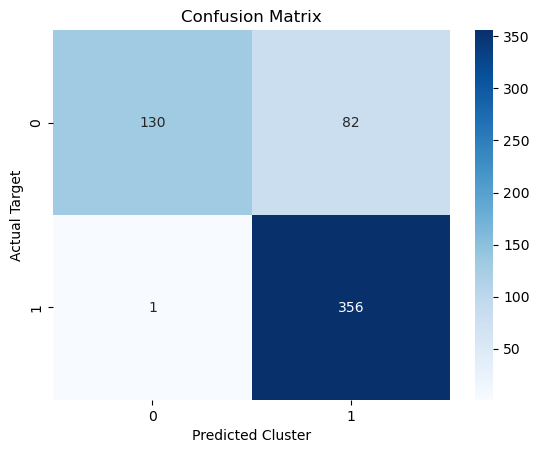

In [67]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df['Cluster_actual'], df['Cluster_predict'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Target')
plt.show()

### Visualizations for K-Means Clustering 

#### Elbow Joint Plot

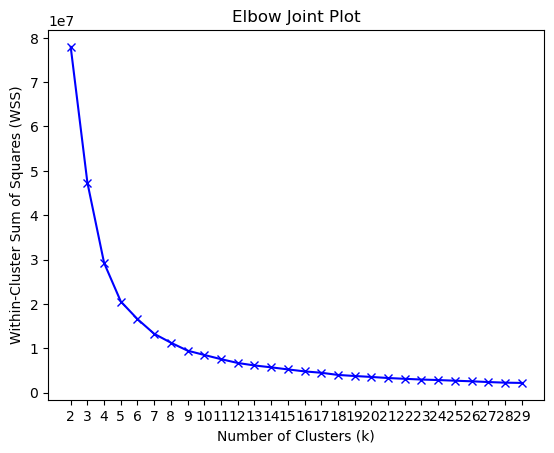

In [68]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Range of k values
k_values = range(2, 30)
wss_values = []

# Fit and calculate the WSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.drop('target', axis=1))
    wss_values.append(kmeans.inertia_)

plt.plot(k_values, wss_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Joint Plot')
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1.0))
plt.show()

#### Silhouette Plot

The average silhouette score is: 0.6972644715687979


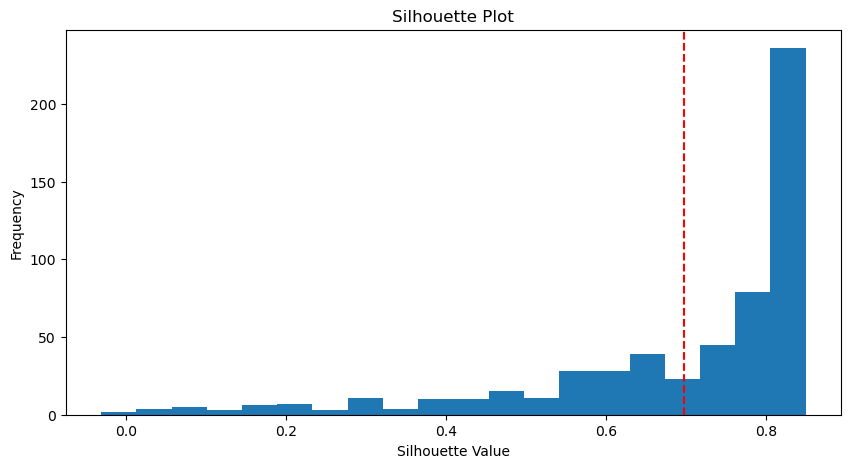

In [69]:
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('target', axis=1))

# Calculating silhouette score
silhouette_avg = silhouette_score(df.drop('target', axis=1), kmeans.labels_)
print("The average silhouette score is:", silhouette_avg)

# Calculate silhouette score of each data point
silhouette_values = silhouette_samples(df.drop('target', axis=1), kmeans.labels_)

plt.figure(figsize=(10, 5))
plt.hist(silhouette_values, bins=20)
plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.xlabel('Silhouette Value')
plt.ylabel('Frequency')
plt.title('Silhouette Plot')
plt.show()

#### True Class Plot 

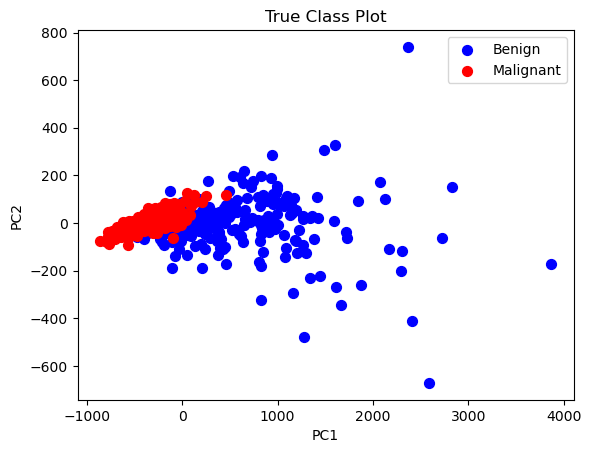

In [70]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('target', axis=1))


plt.scatter(X_pca[df['target'] == 0, 0], X_pca[df['target'] == 0, 1], s=50, c='blue', label='Benign')
plt.scatter(X_pca[df['target'] == 1, 0], X_pca[df['target'] == 1, 1], s=50, c='red', label='Malignant')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('True Class Plot')
plt.show()

#### Predicted Class Plot

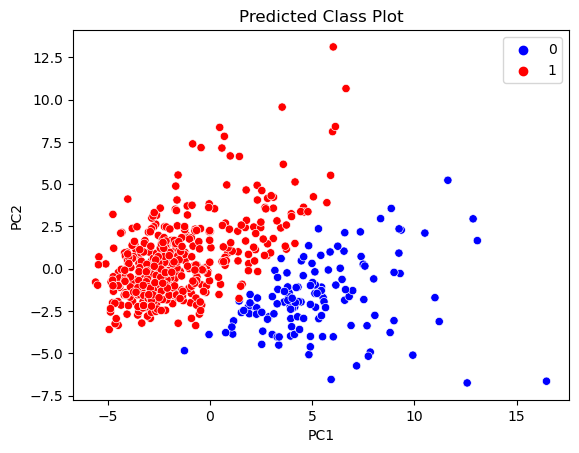

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(df.drop('target', axis=1))

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster_predict'] = Cluster_predict
pca_df['Cluster_actual'] = df['target']

sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['Cluster_predict'], palette=['blue', 'red'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted Class Plot')
plt.legend(loc='upper right')
plt.show()